In [ ]:
import zipfile as zf
files = zf.ZipFile("cali_files.zip", 'r')
files.extractall('MPI_test')
files.close()

In [57]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob
from math import frexp


import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [58]:
tk = th.Thicket.from_caliperreader(glob("MPI_test/*.cali"))

In [59]:
tk.dataframe

,,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Avg GPU time/rank,Min GPU time/rank,Max GPU time/rank,Total GPU time,name
node,profile,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",1127880478,1,regionprofile,0.452021,0.452021,0.452021,0.452021,0.000005,0.000005,0.000005,0.000005,main
"{'name': 'bitonic_sort', 'type': 'function'}",1127880478,3,regionprofile,0.445493,0.445493,0.445493,0.445493,0.000005,0.000005,0.000005,0.000005,bitonic_sort
"{'name': 'comm', 'type': 'function'}",1127880478,4,regionprofile,0.000130,0.000130,0.000130,0.000130,0.000002,0.000002,0.000002,0.000002,comm
"{'name': 'comm_large', 'type': 'function'}",1127880478,5,regionprofile,0.000081,0.000081,0.000081,0.000081,0.000002,0.000002,0.000002,0.000002,comm_large
"{'name': 'cudaMemcpy', 'type': 'function'}",1127880478,6,regionprofile,0.000064,0.000064,0.000064,0.000064,0.000002,0.000002,0.000002,0.000002,cudaMemcpy
"{'name': 'comp', 'type': 'function'}",1127880478,7,regionprofile,0.000073,0.000073,0.000073,0.000073,NaN,NaN,NaN,NaN,comp
"{'name': 'comp_large', 'type': 'function'}",1127880478,8,regionprofile,0.000058,0.000058,0.000058,0.000058,NaN,NaN,NaN,NaN,comp_large
"{'name': 'correctness_check', 'type': 'function'}",1127880478,9,regionprofile,0.000009,0.000009,0.000009,0.000009,NaN,NaN,NaN,NaN,correctness_check
"{'name': 'data_init', 'type': 'function'}",1127880478,2,regionprofile,0.000025,0.000025,0.000025,0.000025,NaN,NaN,NaN,NaN,data_init


In [60]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source,correctness
profile,,,,,,,,,,,,,,,,,,,,,,,,,
1127880478,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/bitonic-65536-4-1.cali,1701331222,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536, 4, 1]",g,bitonic_sort,CUDA,float,4,4,random,65536,0,5,Online and Handwritten,0


In [61]:
tk.metadata.sort_values(by=['num_threads', 'InputSize'])

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source,correctness
profile,,,,,,,,,,,,,,,,,,,,,,,,,
1127880478,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,cali_files/bitonic-65536-4-1.cali,1701331222,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536, 4, 1]",g,bitonic_sort,CUDA,float,4,4,random,65536,0,5,Online and Handwritten,0


In [62]:
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 bitonic_sort
│  ├─ 1.000 comm
│  │  └─ 1.000 comm_large
│  │     └─ 1.000 cudaMemcpy
│  └─ 1.000 comp
│     └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [49]:
gb1 = tk.groupby(["InputSize", "InputType"])


1  thickets created...
{(4, 'random'): <thicket.thicket.Thicket object at 0x2b574ba307c0>}


In [50]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb1.values()),
    headers=list(gb1.keys()),
    axis="columns",
    metadata_key="num_threads"
)
ctk.dataframe

(4, random)  \
                                                               nid   
node                                       num_threads               
{'name': 'main', 'type': 'function'}       65536                 1   
{'name': 'comm', 'type': 'function'}       65536                 3   
{'name': 'comm_large', 'type': 'function'} 65536                 4   
{'name': 'cudaMemcpy', 'type': 'function'} 65536                 5   
{'name': 'data_init', 'type': 'function'}  65536                 2   

                                                                       \
                                                         spot.channel   
node                                       num_threads                  
{'name': 'main', 'type': 'function'}       65536        regionprofile   
{'name': 'comm', 'type': 'function'}       65536        regionprofile   
{'name': 'comm_large', 'type': 'function'} 65536        regionprofile   
{'name': 'cudaMemcpy', 'type': 'function'} 65536        regionprofile   
{'name': 'data_init', 'type': 'function'}  65536        regionprofile   

                                                                      \
                                                       Min time/rank   
node                                       num_threads                 
{'name': 'main', 'type': 'function'}       65536            0.327895   
{'name': 'comm', 'type': 'function'}       65536            0.000083   
{'name': 'comm_large', 'type': 'function'} 65536            0.000014   
{'name': 'cudaMemcpy', 'type': 'function'} 65536                 NaN   
{'name': 'data_init', 'type': 'function'}  65536            0.000016   

                                                                      \
                                                       Max time/rank   
node                                       num_threads                 
{'name': 'main', 'type': 'function'}       65536            0.327895   
{'name': 'comm', 'type': 'function'}       65536            0.000083   
{'name': 'comm_large', 'type': 'function'} 65536            0.000014   
{'name': 'cudaMemcpy', 'type': 'function'} 65536                 NaN   
{'name': 'data_init', 'type': 'function'}  65536            0.000016   

                                                                      \
                                                       Avg time/rank   
node                                       num_threads                 
{'name': 'main', 'type': 'function'}       65536            0.327895   
{'name': 'comm', 'type': 'function'}       65536            0.000083   
{'name': 'comm_large', 'type': 'function'} 65536            0.000014   
{'name': 'cudaMemcpy', 'type': 'function'} 65536                 NaN   
{'name': 'data_init', 'type': 'function'}  65536            0.000016   

                                                                   \
                                                       Total time   
node                                       num_threads              
{'name': 'main', 'type': 'function'}       65536         0.327895   
{'name': 'comm', 'type': 'function'}       65536         0.000083   
{'name': 'comm_large', 'type': 'function'} 65536         0.000014   
{'name': 'cudaMemcpy', 'type': 'function'} 65536              NaN   
{'name': 'data_init', 'type': 'function'}  65536         0.000016   

                                                                          \
                                                       Avg GPU time/rank   
node                                       num_threads                     
{'name': 'main', 'type': 'function'}       65536                0.000005   
{'name': 'comm', 'type': 'function'}       65536                0.000005   
{'name': 'comm_large', 'type': 'function'} 65536                0.000005   
{'name': 'cudaMemcpy', 'type': 'function'} 65536                0.000005   
{'name': 'data_init', 'type': 'function'}  65536                     NaN   

                

In [25]:
num_vals = [65536, 262144, 1048576, 4194304]
types = ["1perturbed", "random", "reverse_sorted", "sorted"]

ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis = 1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

for i in num_vals:
    for j in types:
        ctk.dataframe = ctk.dataframe.reset_index().drop(
            [ 
             ((i, j), "nid"), ((i, j), "spot.channel"), 
             ((i, j), "Min time/rank"), ((i, j), "Max time/rank"),
             ((i, j), "Min GPU time/rank"), ((i, j), "Max GPU time/rank"), 
            ], axis=1)
        ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])


In [26]:
ctk.dataframe


(65536, 1perturbed)                               \
                             Avg time/rank Total time Avg GPU time/rank   
name       num_threads                                                    
main       64                     0.324111   0.324111          0.000969   
           128                    0.333452   0.333452          0.000768   
           256                    0.348477   0.348477          0.000759   
           512                    0.324951   0.324951          0.000759   
           1024                   0.329136   0.329136          0.000935   
comm       64                     0.000065   0.000065          0.000969   
           128                    0.000070   0.000070          0.000768   
           256                    0.000063   0.000063          0.000759   
           512                    0.000052   0.000052          0.000759   
           1024                   0.000058   0.000058          0.000935   
comm_large 64                     0.000012   0.000012          0.000969   
           128                    0.000015   0.000015          0.000768   
           256                    0.000013   0.000013          0.000759   
           512                    0.000011   0.000011          0.000759   
           1024                   0.000013   0.000013          0.000935   
cudaMemcpy 64                          NaN        NaN          0.000969   
           128                         NaN        NaN          0.000768   
           256                         NaN        NaN          0.000759   
           512                         NaN        NaN          0.000759   
           1024                        NaN        NaN          0.000935   
data_init  64                     0.000409   0.000409               NaN   
           128                    0.000422   0.000422               NaN   
           256                    0.000409   0.000409               NaN   
           512                    0.000401   0.000401               NaN   
           1024                   0.000407   0.000407               NaN   

                                      (65536, random)             \
                       Total GPU time   Avg time/rank Total time   
name       num_threads                                             
main       64                0.000969        0.352388   0.352388   
           128               0.000768        0.330212   0.330212   
           256               0.000759        0.321686   0.321686   
           512               0.000759        0.316000   0.316000   
           1024              0.000935        0.316451   0.316451   
comm       64                0.000969        0.000054   0.000054   
           128               0.000768        0.000057   0.000057   
           256               0.000759        0.000054   0.000054   
           512               0.000759        0.000055   0.000055   
           1024              0.000935        0.000055   0.000055   
comm_large 64                0.000969        0.000012   0.000012   
           128               0.000768        0.000013   0.000013   
           256               0.000759        0.000011   0.000011   
           512               0.000759        0.000011   0.000011   
           1024              0.000935        0.000012   0.000012   
cudaMemcpy 64                0.000969             NaN        NaN   
           128               0.000768             NaN        NaN   
           256               0.000759             NaN        NaN   
           512               0.000759             NaN        NaN   
           1024              0.000935             NaN        NaN   
data_init  64                     NaN        0.001498   0.001498   
           128                    NaN        0.001506   0.001506   
           256                    NaN        0.001493   0.001493   
           512                    NaN        0.001500   0.001500   
           1024                   NaN        0.001493   0.001493   

                 

In [27]:
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))

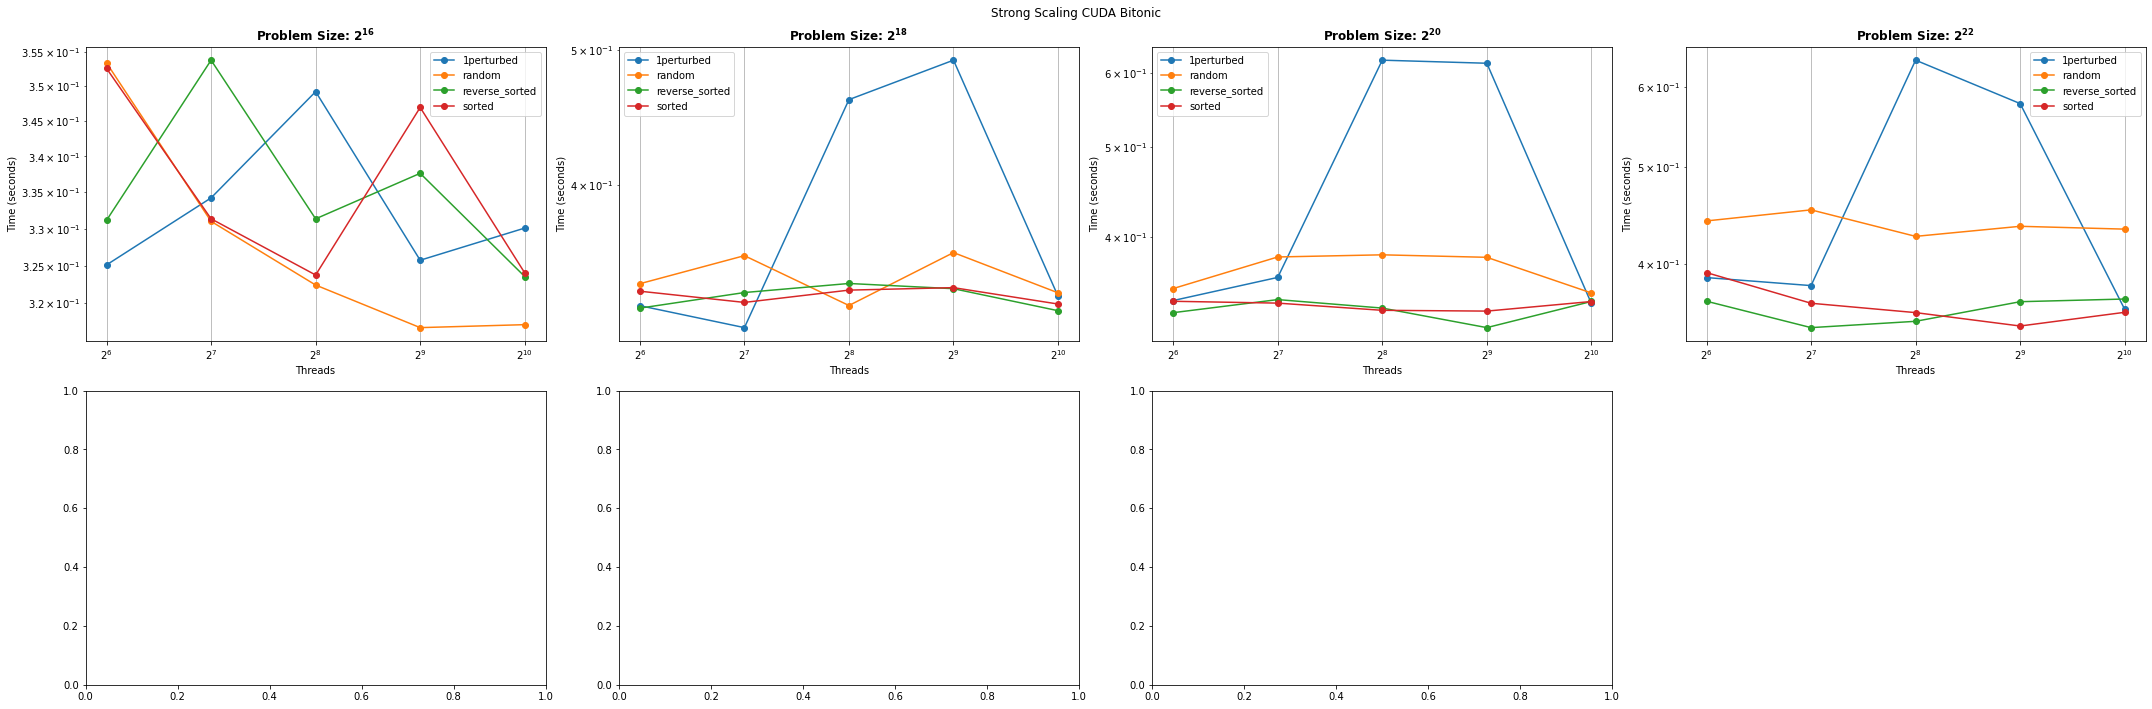

In [35]:
idx = pd.IndexSlice

fig, ax = plt.subplots(2, 4, figsize=(30, 10))
iter = 0

for i in num_vals: 
    for j in types:
        ax[int(iter/4), iter%4].plot(
            ctk.dataframe[idx[(i, j), "Avg time/rank"]].loc['main'] + ctk.dataframe[idx[(i, j), "Avg GPU time/rank"]].loc['main'],
            marker='o',
            label = j
        )
    ax[int(iter/4), iter%4].set_title(rf"Problem Size: $\mathregular{{2^{{{str(frexp(i)[1] - 1)}}}}}$", fontsize=12, weight='bold')
    ax[int(iter/4), iter%4].set_xlabel("Threads")
    ax[int(iter/4), iter%4].set_ylabel("Time (seconds)")
    ax[int(iter/4), iter%4].set_yscale("log", base=10)
    ax[int(iter/4), iter%4].set_xscale("log", base=2)
    ax[int(iter/4), iter%4].grid(True)
    ax[int(iter/4), iter%4].set_xticks(threads)
    ax[int(iter/4), iter%4].legend()    
    iter += 1
ax[-1, -1].axis('off')
plt.suptitle("Strong Scaling CUDA Bitonic")
fig.tight_layout()
# plt.savefig("cuda_bitonic/strong_scaling.png")
plt.show()

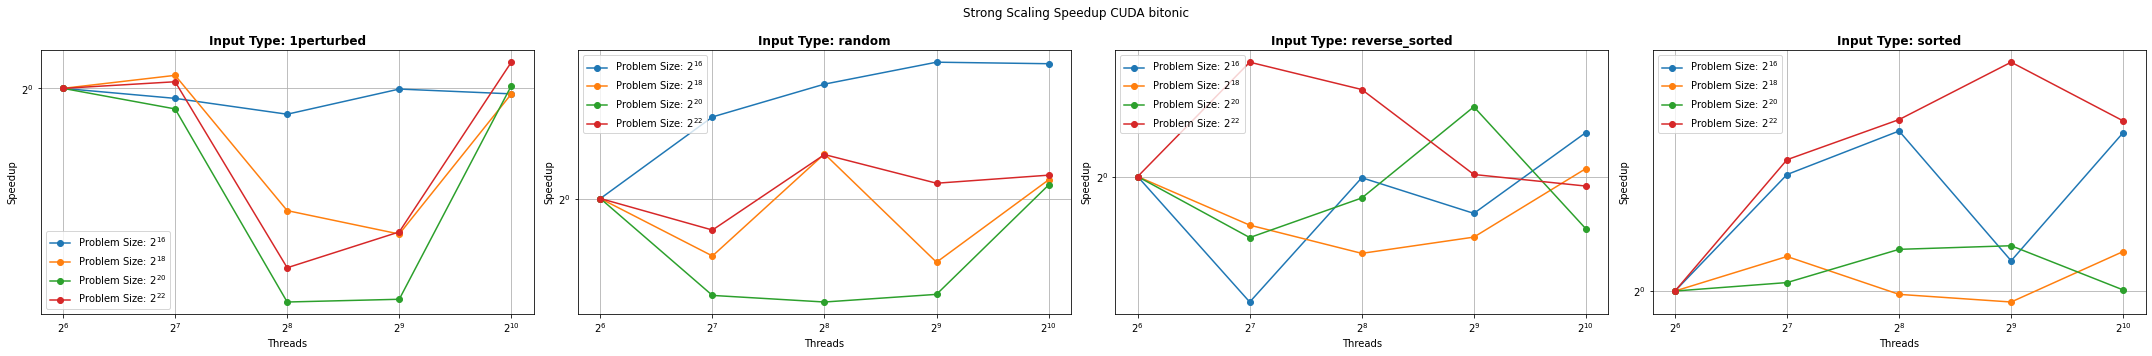

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(30, 5))
iter = 0

for i in types: 
    for j in num_vals:
        ax[iter].plot(
            (ctk.dataframe[idx[(j, i), "Avg time/rank"]].loc['main'] + 
            ctk.dataframe[idx[(j, i), "Avg GPU time/rank"]].loc['main']).loc[64] / 
            (ctk.dataframe[idx[(j, i), "Avg time/rank"]].loc['main'] + 
            ctk.dataframe[idx[(j, i), "Avg GPU time/rank"]].loc['main']),
            marker='o',
            label = rf"Problem Size: $\mathregular{{2^{{{str(frexp(j)[1] - 1)}}}}}$"
        )
    ax[iter].set_title(rf"Input Type: " + i, fontsize=12, weight='bold')
    ax[iter].set_xlabel("Threads")
    ax[iter].set_ylabel("Speedup")
    ax[iter].set_yscale("log", base=2)
    ax[iter].set_xscale("log", base=2)
    ax[iter].grid(True)
    ax[iter].set_xticks(threads)
    ax[iter].legend()    
    iter += 1

plt.suptitle("Strong Scaling Speedup CUDA bitonic")
fig.tight_layout()
plt.savefig("CUDA_bitonic_graphs/speedup_strong_scaling.png")
plt.show()

In [38]:
subset_threads = [64, 256, 1024]
small_subset_size = num_vals[:3]
large_subset_size = num_vals[-3:]

In [39]:
rows = []

for i in range(3):
    cpu = ctk.dataframe.loc['main', idx[((small_subset_size[i], types[0]), 
                                               (small_subset_size[i], types[1]), 
                                              (small_subset_size[i], types[2]),
                                              (small_subset_size[i], types[3])),
                                              "Avg time/rank"]].loc[subset_threads[i]]
    gpu = ctk.dataframe.loc['main', idx[((small_subset_size[i], types[0]), 
                                               (small_subset_size[i], types[1]), 
                                              (small_subset_size[i], types[2]),
                                              (small_subset_size[i], types[3])),
                                              "Avg GPU time/rank"]].loc[subset_threads[i]]
    
    for j in range(3):
        cpu[((small_subset_size[i], types[0]), "Avg time/rank")] += gpu[((small_subset_size[i], types[0]), "Avg GPU time/rank")]
        cpu[((small_subset_size[i], types[1]), "Avg time/rank")] += gpu[((small_subset_size[i], types[1]), "Avg GPU time/rank")]
        cpu[((small_subset_size[i], types[2]), "Avg time/rank")] += gpu[((small_subset_size[i], types[2]), "Avg GPU time/rank")]
        cpu[((small_subset_size[i], types[3]), "Avg time/rank")] += gpu[((small_subset_size[i], types[3]), "Avg GPU time/rank")]
    
    rows.append(cpu)
    
small_subset = pd.DataFrame(rows)

In [40]:
rows = []

for i in range(3):
    cpu = ctk.dataframe.loc['main', idx[((large_subset_size[i], types[0]), 
                                               (large_subset_size[i], types[1]), 
                                              (large_subset_size[i], types[2]),
                                              (large_subset_size[i], types[3])),
                                              "Avg time/rank"]].loc[subset_threads[i]]
    gpu = ctk.dataframe.loc['main', idx[((large_subset_size[i], types[0]), 
                                               (large_subset_size[i], types[1]), 
                                              (large_subset_size[i], types[2]),
                                              (large_subset_size[i], types[3])),
                                              "Avg GPU time/rank"]].loc[subset_threads[i]]
    
    for j in range(3):
        cpu[((large_subset_size[i], types[0]), "Avg time/rank")] += gpu[((large_subset_size[i], types[0]), "Avg GPU time/rank")]
        cpu[((large_subset_size[i], types[1]), "Avg time/rank")] += gpu[((large_subset_size[i], types[1]), "Avg GPU time/rank")]
        cpu[((large_subset_size[i], types[2]), "Avg time/rank")] += gpu[((large_subset_size[i], types[2]), "Avg GPU time/rank")]
        cpu[((large_subset_size[i], types[3]), "Avg time/rank")] += gpu[((large_subset_size[i], types[3]), "Avg GPU time/rank")]
    
    rows.append(cpu)
    
large_subset = pd.DataFrame(rows)

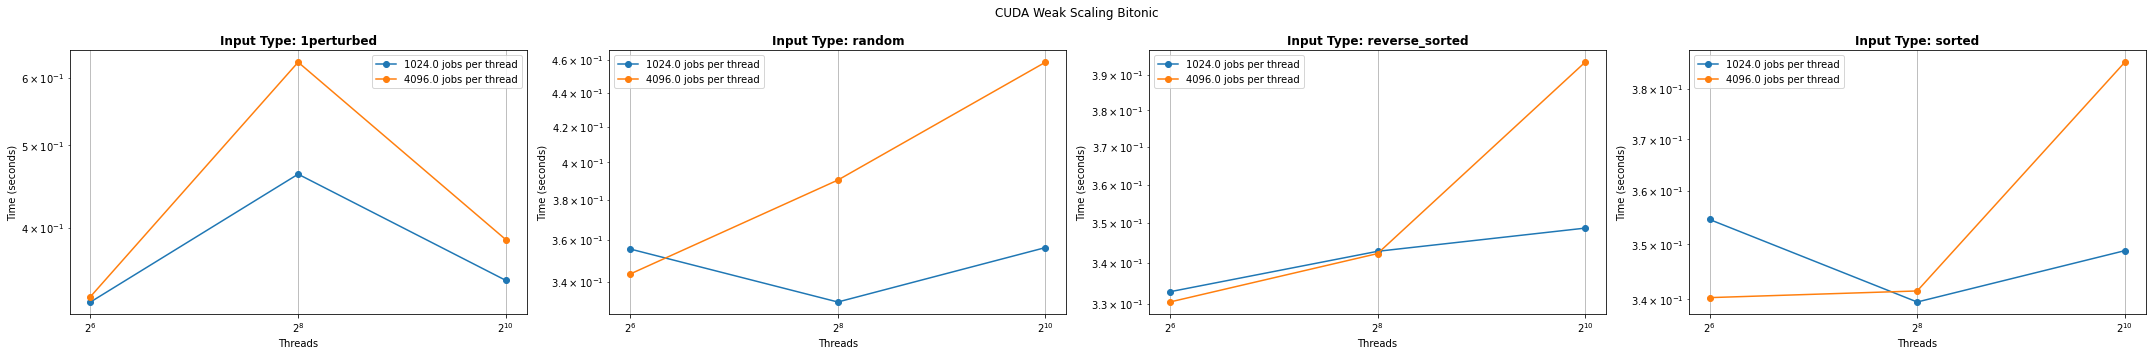

In [41]:
fig, ax = plt.subplots(1, 4, figsize=(30, 5))
iter = 0

for i in types:
    small_r1 = pd.DataFrame(small_subset.loc[:, idx[((small_subset_size[0], i),), "Avg time/rank"]].loc[subset_threads[0]]).loc[((small_subset_size[0], i),)] 
    small_r2 = pd.DataFrame(small_subset.loc[:, idx[((small_subset_size[1], i),), "Avg time/rank"]].loc[subset_threads[1]]).loc[((small_subset_size[1], i),)] 
    small_r3 = pd.DataFrame(small_subset.loc[:, idx[((small_subset_size[2], i),), "Avg time/rank"]].loc[subset_threads[2]]).loc[((small_subset_size[2], i),)]

    large_r1 = pd.DataFrame(large_subset.loc[:, idx[((large_subset_size[0], i),), "Avg time/rank"]].loc[subset_threads[0]]).loc[((large_subset_size[0], i),)] 
    large_r2 = pd.DataFrame(large_subset.loc[:, idx[((large_subset_size[1], i),), "Avg time/rank"]].loc[subset_threads[1]]).loc[((large_subset_size[1], i),)] 
    large_r3 = pd.DataFrame(large_subset.loc[:, idx[((large_subset_size[2], i),), "Avg time/rank"]].loc[subset_threads[2]]).loc[((large_subset_size[2], i),)]
    
    ax[iter].plot(
        small_r1.merge(small_r2, how='cross').merge(small_r3, how='cross').T,
        marker='o',
        label = str(small_subset_size[0]/subset_threads[0]) + " jobs per thread"
    )
    ax[iter].plot(
        large_r1.merge(large_r2, how='cross').merge(large_r3, how='cross').T,
        marker='o',
        label = str(large_subset_size[0]/subset_threads[0]) + " jobs per thread"
    )
    
    ax[iter].set_title(rf"Input Type: " + i, fontsize=12, weight='bold')
    ax[iter].set_xlabel("Threads")
    ax[iter].set_ylabel("Time (seconds)")
    ax[iter].set_yscale("log", base=10)
    ax[iter].set_xscale("log", base=2)
    ax[iter].grid(True)
    ax[iter].set_xticks(subset_threads)
    ax[iter].legend()
    iter += 1
    
plt.suptitle("CUDA Weak Scaling Bitonic")
fig.tight_layout()
plt.savefig("CUDA_bitonic_graphs/weak_scaling.png")
plt.show()

KeyError: 'comp'

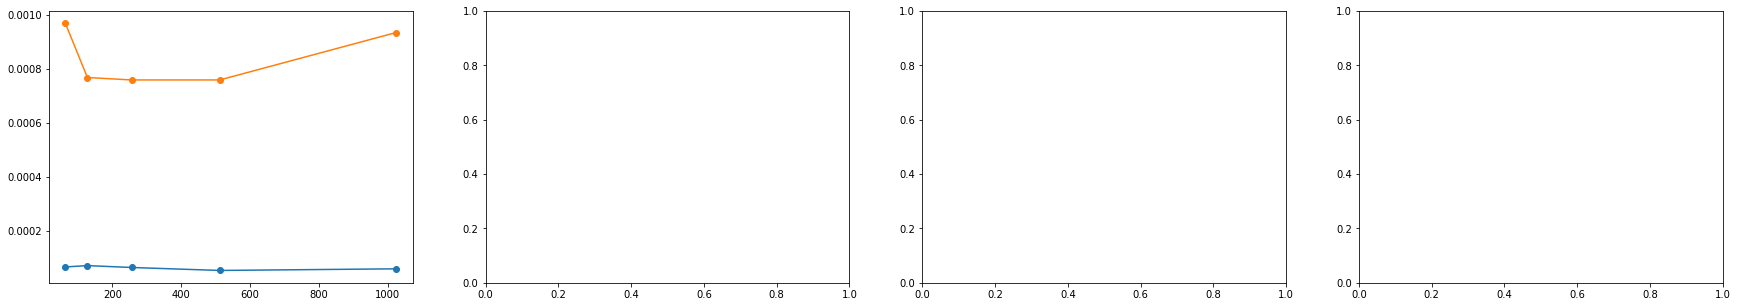

In [42]:
for i in num_vals:
    fig, ax = plt.subplots(1, 4, figsize=(30, 5))
    iter = 0
    for j in types:
        ax[iter].plot(
            ctk.dataframe.loc['comm', idx[((i, j),), "Avg time/rank"]],
            marker='o',
            label = "comm CPU"
        )
        ax[iter].plot(
            ctk.dataframe.loc['comm', idx[((i, j),), "Avg GPU time/rank"]],
            marker='o',
            label = "comm GPU"
        )
        ax[iter].plot(
            ctk.dataframe.loc['comp', idx[((i, j),), "Avg time/rank"]],
            marker='o',
            label = "comp CPU"
        )
        ax[iter].plot(
            ctk.dataframe.loc['comp', idx[((i, j),), "Avg GPU time/rank"]],
            marker='o',
            label = "comp GPU"
        )
        ax[iter].set_title(rf"Problem Size: $\mathregular{{2^{{{str(frexp(i)[1] - 1)}}}}}$ " + j, fontsize=12, weight='bold')
        ax[iter].set_xlabel("Threads")
        ax[iter].set_ylabel("Time (seconds)")
        ax[iter].set_yscale("log", base=10)
        ax[iter].set_xscale("log", base=2)
        ax[iter].grid(True)
        ax[iter].set_xticks(threads)
        ax[iter].legend()
        iter += 1
        
    plt.suptitle("Comm vs Comp CUDA Bitonic ")
    fig.tight_layout()
    plt.savefig("CUDA_bitonic_graphs/" + str(i) + "_comm_comp.png")
    plt.show()